In [4]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re 
import string 
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from textblob import TextBlob, Word
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

In [6]:
# load csv file

seek = pd.read_csv('../Project-4/seek/seek.csv')

### EDA

In [7]:
# check the data shape

seek.shape

(2795, 7)

In [8]:
# check the data types

seek.dtypes

title          object
date           object
company        object
location       object
area           object
salary         object
description    object
dtype: object

In [9]:
# check the null values

seek.isnull().sum()

title            0
date             0
company        129
location         0
area             0
salary           0
description    651
dtype: int64

In [10]:
# check the first 5 rows of the data 

seek.head(5)

,title,date,company,location,area,salary,description
0,Graduate Analyst Programmer,9 Feb 2021,Blue Crystal Solutions Pty Ltd,Adelaide,Developers/Programmers,Full Time,Blue Crystal Solutions is a trusted and respec...
1,Data Analyst,26 Jan 2021,MADEC Employment and Training,Mildura & Murray,Analysis & Reporting,Not-for-profit Tax Saving benefits available!,We are seeking a Data Analyst who is up for th...
2,Group Pricing Analyst,10 Feb 2021,NaN,Sydney,"CBD, Inner West & Eastern Suburbs",Full Time,MetLife are a leading provider of life insuran...
3,Graduate Operations Coordinator,29 Jan 2021,NaN,Sydney,North Shore & Northern Beaches,Full Time,We are looking for two enthusiastic and motiva...
4,Data Analyst / Administration Manager,13 Feb 2021,FRHP Holdings Pty Ltd,Sydney,Parramatta & Western Suburbs,Full Time,Pace Farms is a second generation family busin...


### Clean the Title Column

In [11]:
# check the title name in ascending order based on its frequency 

seek.title.value_counts().sort_values(ascending=False)

Data Engineer                                68
Data Analyst                                 51
Data Scientist                               48
Software Engineer                            18
Azure Data Engineer                          15
                                             ..
Graduate Developer                            1
Graduate Risk Advisory                        1
Technician                                    1
Medical Laboratory Assistant                  1
Health Program Officer -12 Month Contract     1
Name: title, Length: 1059, dtype: int64

In [12]:
# pre-processing of text data prior to generating the vector representation

vectorizer = CountVectorizer(strip_accents = 'unicode', stop_words='english', 
                     ngram_range=(1,1))

seek.title = seek.title.fillna(value='-')
X = pd.DataFrame(vectorizer.fit_transform(seek.title).todense(),
                columns= vectorizer.get_feature_names())

<AxesSubplot:>

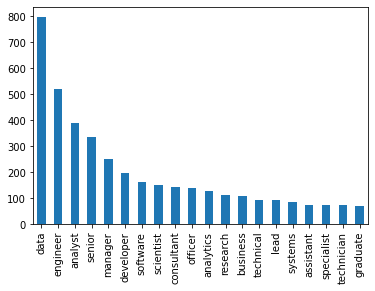

In [15]:
# check the most frequent 

seek_title = X.sum().sort_values(ascending =False)
seek_title.head(20).plot(kind='bar')

In [16]:
len(seek_title)

958

In [17]:
def title_category(title):
    title = str(title).lower()
#    title = re.sub(r'[^\w\s]', ' ', title).lower()
    if any(x in title for x in ['entry', 'junior', 'graduate','fresh', 'assistant']):
        return 'Entry level'
    elif any(x in title for x in ['senior','lead', 'head', 'manager','management','adviser','executive', 'director', 'specialist']):
        return 'Senior level'
    elif any(x in title for x in ['engineer', 'engineering', 'developer', 'software','programmer', 'technicial', 'systems', 'technician']):
        return 'Data Engineer'
    elif any(x in title for x in ['science', 'scientist', 'Scientist']):
        return 'Data Scientist'
    elif any(x in title for x in ['analyst', 'analytics', 'analytic', 'analysis']):
        return 'Data Analyst'
    else:
        return 'Other'
    
seek['Job_Category'] = seek['title'].apply(title_category)

In [18]:
seek.Job_Category.value_counts()

Senior level      788
Other             692
Data Engineer     669
Data Analyst      307
Entry level       199
Data Scientist    140
Name: Job_Category, dtype: int64

In [19]:
seek[seek.Job_Category == 'Other']

,title,date,company,location,area,salary,description,Job_Category
25,Social Media Coordinator,11 Feb 2021,NaN,Sydney,Marketing Assistants/Coordinators,Full Time,",Better Science. Better Art. Better Outcomes....",Other
28,Online Academic Tutor,4 Feb 2021,SavvyPro Education,Sydney,"CBD, Inner West & Eastern Suburbs",Starting at $30 per hour,"Location: This job is remote,Job Type: Part-Ti...",Other
34,Imaging & Data,21 Jan 2021,GFP Group,Melbourne,Eastern Suburbs,Full Time,GFP Group is the market leader in graduation s...,Other
45,Customer Care Consultant,27 Jan 2021,Australian Retailers Association Talent Registry,Sydney,"CBD, Inner West & Eastern Suburbs",Full Time,NaN,Other
46,Animal Technical Officer,5 Feb 2021,NaN,Albury Area,Laboratory & Technical Services,Full Time,We are one of Australia's leading integrated A...,Other
...,...,...,...,...,...,...,...,...
2786,Sales Support Rep. (6 month temporary hiring a...,19 Jan 2021,ERICO PRODUCTS AUSTRALIA PTY LTD,Sydney,"CBD, Inner West & Eastern Suburbs","$50,000 - $59,999","It's a 6 month temp, but there is opportunity...",Other
2787,Archaeologist / Heritage Advisor Regional NSW,19 Jan 2021,Eco Logical Australia,Tamworth & North West NSW,Environment & Sustainability Consulting,Full Time,"Are you seeking a company that:,With the conti...",Other
2788,Archaeologist / Heritage Advisor Regional NSW,19 Jan 2021,Eco Logical Australia,Blue Mountains & Central West,Environment & Sustainability Consulting,Full Time,"Are you seeking a company that:,With the conti...",Other
2790,Archaeologist / Heritage Advisor Regional NSW,19 Jan 2021,Eco Logical Australia,"Newcastle, Maitland & Hunter",Environment & Sustainability Consulting,Full Time,"Are you seeking a company that:,With the conti...",Other


In [20]:
seek[seek.Job_Category == 'Data Scientist']

,title,date,company,location,area,salary,description,Job_Category
7,Data Scientist,5 Feb 2021,Sweat Pty Ltd,Adelaide,"Mathematics, Statistics & Information Sciences",Competitive salary with great culture and bene...,Sweat is one of the world’s largest digital pl...,Data Scientist
21,QUT and ABS PhD scholarships in Data Science,4 Feb 2021,NaN,Brisbane,CBD & Inner Suburbs,"$30,000 per annum for three years",The QUT Centre for Data Science and the Austra...,Data Scientist
22,Principal Data Scientist,20 Jan 2021,NaN,Melbourne,CBD & Inner Suburbs,base + super + incentive,SEEK is looking for an experienced statisticia...,Data Scientist
44,Data Scientist,5 Feb 2021,Sweat Pty Ltd,Melbourne,CBD & Inner Suburbs,Competitive salary with great culture and bene...,Sweat is one of the world’s largest digital pl...,Data Scientist
67,Medical Laboratory Scientist,12 Feb 2021,Milano Appointments,Ballarat & Central Highlands,Laboratory & Technical Services,Full Time,"This impressive, Ballarat-based business is a ...",Data Scientist
...,...,...,...,...,...,...,...,...
2665,R&D Scientist / Biochemist,22 Jan 2021,Techstaff,Melbourne,CBD & Inner Suburbs,Full Time,"Our client, a leader in the innovation and com...",Data Scientist
2667,R&D Scientist / Chemist,22 Jan 2021,Techstaff,Melbourne,CBD & Inner Suburbs,Full Time,"Our client, a leader in the innovation and com...",Data Scientist
2681,Vision deep learning scientist,8 Feb 2021,Endevea,Perth,Fremantle & Southern Suburbs,$100k to $150k depending on skills,Do you want to work on Deep Learning models fo...,Data Scientist
2722,Field Application Scientist,21 Jan 2021,BGI International Pty Ltd,Sydney,"CBD, Inner West & Eastern Suburbs",Full Time,"MGI, the instrument manufacturing subsidiary u...",Data Scientist


In [21]:
seek[seek.Job_Category == 'Data Analyst']

,title,date,company,location,area,salary,description,Job_Category
1,Data Analyst,26 Jan 2021,MADEC Employment and Training,Mildura & Murray,Analysis & Reporting,Not-for-profit Tax Saving benefits available!,We are seeking a Data Analyst who is up for th...,Data Analyst
2,Group Pricing Analyst,10 Feb 2021,NaN,Sydney,"CBD, Inner West & Eastern Suburbs",Full Time,MetLife are a leading provider of life insuran...,Data Analyst
5,Data Analyst,9 Feb 2021,Hays Banking,Melbourne,CBD & Inner Suburbs,Contract/Temp,Hays is proud to be supporting NAB in the recr...,Data Analyst
6,Geospatial Analyst,10 Feb 2021,Aethon Aerial Solutions,Brisbane,CBD & Inner Suburbs,Casual/Vacation,Aethon Aerial Solutions Australia provide Aeri...,Data Analyst
8,Data Analyst,8 Feb 2021,Modis,ACT,Other,Contract/Temp,"One of our government client in , seeks the se...",Data Analyst
...,...,...,...,...,...,...,...,...
2528,Cyber Security Analyst,4 Feb 2021,Bluefin Resources Pty Limited,Melbourne,CBD & Inner Suburbs,Full Time,Our client has an established team who are loo...,Data Analyst
2580,Business Analyst - Technical,29 Jan 2021,The Recruitment Company,Sydney,Business/Systems Analysts,$776 Daily plus Super,Exciting opportunity for an experienced Techni...,Data Analyst
2654,Digital Insights Analyst,21 Jan 2021,Talent Insights Group Pty Ltd,Sydney,"CBD, Inner West & Eastern Suburbs",Full Time,NaN,Data Analyst
2727,"Business Analyst, Collection Products",19 Jan 2021,Cubane Consulting Pty Ltd,Sydney,North Shore & Northern Beaches,Full Time,We have an exciting opportunity for a Business...,Data Analyst


### Check the Date Column

In [22]:
seek.date.value_counts()

10 Feb 2021    194
9 Feb 2021     168
29 Jan 2021    166
8 Feb 2021     154
12 Feb 2021    150
11 Feb 2021    148
19 Jan 2021    147
15 Feb 2021    140
4 Feb 2021     136
1 Feb 2021     133
2 Feb 2021     127
28 Jan 2021    121
3 Feb 2021     112
5 Feb 2021     109
18 Jan 2021    105
27 Jan 2021    104
21 Jan 2021    101
22 Jan 2021     98
20 Jan 2021     92
25 Jan 2021     51
7 Feb 2021      41
14 Feb 2021     41
26 Jan 2021     32
31 Jan 2021     25
30 Jan 2021     23
24 Jan 2021     18
17 Jan 2021     17
16 Jan 2021     13
13 Feb 2021     12
15 Jan 2021      5
6 Feb 2021       5
23 Jan 2021      3
date             2
14 Jan 2021      2
Name: date, dtype: int64

### Clean the Company Column

In [23]:
seek.company.value_counts

<bound method IndexOpsMixin.value_counts of 0       Blue Crystal Solutions Pty Ltd
1        MADEC Employment and Training
2                                  NaN
3                                  NaN
4                FRHP Holdings Pty Ltd
                     ...              
2790             Eco Logical Australia
2791                 Prenolica Limited
2792                 PACIFIC COMMUNITY
2793       Imperial Brands Australasia
2794                 ProCare Australia
Name: company, Length: 2795, dtype: object>

In [24]:
seek[seek.company == 'Harvey Nash']

,title,date,company,location,area,salary,description,Job_Category
907,Test Analyst - Based in Darwin,12 Feb 2021,Harvey Nash,Darwin,Testing & Quality Assurance,Excellent rate,NaN,Data Analyst
909,Test Analyst - Based in Darwin,12 Feb 2021,Harvey Nash,Sydney,"CBD, Inner West & Eastern Suburbs",Excellent rate,NaN,Data Analyst
911,Test Analyst - Based in Darwin,12 Feb 2021,Harvey Nash,Adelaide,Testing & Quality Assurance,Excellent rate,NaN,Data Analyst
912,Test Analyst - Based in Darwin,12 Feb 2021,Harvey Nash,Melbourne,CBD & Inner Suburbs,Excellent rate,NaN,Data Analyst
913,Test Analyst - Based in Darwin,12 Feb 2021,Harvey Nash,Perth,"CBD, Inner & Western Suburbs",Excellent rate,NaN,Data Analyst
915,Test Analyst - Based in Darwin,12 Feb 2021,Harvey Nash,Brisbane,CBD & Inner Suburbs,Excellent rate,NaN,Data Analyst
1068,EPS 273 - Technical Business Analysts - based ...,29 Jan 2021,Harvey Nash,Adelaide,Business/Systems Analysts,Excellent Rate,NaN,Data Analyst
1070,EPS 273 - Technical Business Analysts - based ...,29 Jan 2021,Harvey Nash,Sydney,"CBD, Inner West & Eastern Suburbs",Excellent Rate,NaN,Data Analyst
1071,EPS 273 - Technical Business Analysts - based ...,29 Jan 2021,Harvey Nash,Perth,"CBD, Inner & Western Suburbs",Excellent Rate,NaN,Data Analyst
1072,EPS 273 - Technical Business Analysts - based ...,29 Jan 2021,Harvey Nash,Darwin,Business/Systems Analysts,Excellent Rate,NaN,Data Analyst


### Clean the Location Column

In [25]:
seek.location.value_counts()

Sydney                                  974
Melbourne                               617
Brisbane                                283
ACT                                     219
Perth                                   216
Adelaide                                123
Sunshine Coast                           28
Newcastle, Maitland & Hunter             28
Darwin                                   26
Northern QLD                             22
Gold Coast                               20
Wagga Wagga & Riverina                   18
Wollongong, Illawarra & South Coast      16
Shepparton & Goulburn Valley             15
Bendigo, Goldfields & Macedon Ranges     14
Tamworth & North West NSW                13
Toowoomba & Darling Downs                11
Blue Mountains & Central West            11
Cairns & Far North                       10
Mildura & Murray                         10
Hobart                                    9
South West Coast VIC                      9
Albury Area                     

In [26]:
major_city = ['Sydney','Melbourne','Brisbane','ACT','Perth','Adelaide']
seek['City'] = seek['location'].map(lambda x: x if x in major_city else 'Other')

In [27]:
seek

,title,date,company,location,area,salary,description,Job_Category,City
0,Graduate Analyst Programmer,9 Feb 2021,Blue Crystal Solutions Pty Ltd,Adelaide,Developers/Programmers,Full Time,Blue Crystal Solutions is a trusted and respec...,Entry level,Adelaide
1,Data Analyst,26 Jan 2021,MADEC Employment and Training,Mildura & Murray,Analysis & Reporting,Not-for-profit Tax Saving benefits available!,We are seeking a Data Analyst who is up for th...,Data Analyst,Other
2,Group Pricing Analyst,10 Feb 2021,NaN,Sydney,"CBD, Inner West & Eastern Suburbs",Full Time,MetLife are a leading provider of life insuran...,Data Analyst,Sydney
3,Graduate Operations Coordinator,29 Jan 2021,NaN,Sydney,North Shore & Northern Beaches,Full Time,We are looking for two enthusiastic and motiva...,Entry level,Sydney
4,Data Analyst / Administration Manager,13 Feb 2021,FRHP Holdings Pty Ltd,Sydney,Parramatta & Western Suburbs,Full Time,Pace Farms is a second generation family busin...,Senior level,Sydney
...,...,...,...,...,...,...,...,...,...
2790,Archaeologist / Heritage Advisor Regional NSW,19 Jan 2021,Eco Logical Australia,"Newcastle, Maitland & Hunter",Environment & Sustainability Consulting,Full Time,"Are you seeking a company that:,With the conti...",Other,Other
2791,Marketing Specialist,19 Jan 2021,Prenolica Limited,Melbourne,CBD & Inner Suburbs,"$65,000 - $74,999","You will work for Prenolica, an Australian Bio...",Senior level,Melbourne
2792,Graphic Designer - Coordinator,19 Jan 2021,PACIFIC COMMUNITY,Asia Pacific,PNG & Pacific Islands,"$80,000 - $99,999 & expatriate package",",The , (SPC) is the principal scientific and ...",Other,Other
2793,Accounts Assistant,19 Jan 2021,Imperial Brands Australasia,Sydney,North West & Hills District,Full Time,Celebrate wins in a collaborative work environ...,Entry level,Sydney


### Clean the Area Column

In [28]:
seek.area.unique()

array(['Developers/Programmers', 'Analysis & Reporting',
       'CBD, Inner West & Eastern Suburbs',
       'North Shore & Northern Beaches', 'Parramatta & Western Suburbs',
       'CBD & Inner Suburbs',
       'Mathematics, Statistics & Information Sciences', 'Other',
       'Government - Federal', 'Engineering - Software',
       'Market Research & Analysis', 'Western Suburbs',
       'CBD, Inner & Western Suburbs',
       'Marketing Assistants/Coordinators', 'Mining - Operations',
       'Bayside & South Eastern Suburbs', 'Ryde & Macquarie Park',
       'Eastern Suburbs', 'Analysts', 'Laboratory & Technical Services',
       'Help Desk & IT Support', 'Media Strategy, Planning & Buying',
       'Environmental, Earth & Geosciences', 'Administrative Assistants',
       'Government - State', 'Agronomy & Farm Services', 'Horticulture',
       'Fremantle & Southern Suburbs', 'Teaching - Tertiary',
       'Northern Suburbs', 'Engineering - Hardware',
       'Clinical/Medical Research', 'Cu

In [29]:
def area_category(area):
    area = str(area).lower()
    if any(x in area for x in ['cbd', 'inner']):
        return 'CBD'
    elif any(x in area for x in ['north','northern']):
        return 'North'
    elif any(x in area for x in ['south', 'southern']):
        return 'South'
    elif any(x in area for x in ['west', 'western']):
        return 'West'
    elif any(x in area for x in ['east', 'eastern']):
        return 'East'
    else:
        return 'Other'
    
seek['Area_Category'] = seek['area'].apply(area_category)

In [30]:
seek

,title,date,company,location,area,salary,description,Job_Category,City,Area_Category
0,Graduate Analyst Programmer,9 Feb 2021,Blue Crystal Solutions Pty Ltd,Adelaide,Developers/Programmers,Full Time,Blue Crystal Solutions is a trusted and respec...,Entry level,Adelaide,Other
1,Data Analyst,26 Jan 2021,MADEC Employment and Training,Mildura & Murray,Analysis & Reporting,Not-for-profit Tax Saving benefits available!,We are seeking a Data Analyst who is up for th...,Data Analyst,Other,Other
2,Group Pricing Analyst,10 Feb 2021,NaN,Sydney,"CBD, Inner West & Eastern Suburbs",Full Time,MetLife are a leading provider of life insuran...,Data Analyst,Sydney,CBD
3,Graduate Operations Coordinator,29 Jan 2021,NaN,Sydney,North Shore & Northern Beaches,Full Time,We are looking for two enthusiastic and motiva...,Entry level,Sydney,North
4,Data Analyst / Administration Manager,13 Feb 2021,FRHP Holdings Pty Ltd,Sydney,Parramatta & Western Suburbs,Full Time,Pace Farms is a second generation family busin...,Senior level,Sydney,West
...,...,...,...,...,...,...,...,...,...,...
2790,Archaeologist / Heritage Advisor Regional NSW,19 Jan 2021,Eco Logical Australia,"Newcastle, Maitland & Hunter",Environment & Sustainability Consulting,Full Time,"Are you seeking a company that:,With the conti...",Other,Other,Other
2791,Marketing Specialist,19 Jan 2021,Prenolica Limited,Melbourne,CBD & Inner Suburbs,"$65,000 - $74,999","You will work for Prenolica, an Australian Bio...",Senior level,Melbourne,CBD
2792,Graphic Designer - Coordinator,19 Jan 2021,PACIFIC COMMUNITY,Asia Pacific,PNG & Pacific Islands,"$80,000 - $99,999 & expatriate package",",The , (SPC) is the principal scientific and ...",Other,Other,Other
2793,Accounts Assistant,19 Jan 2021,Imperial Brands Australasia,Sydney,North West & Hills District,Full Time,Celebrate wins in a collaborative work environ...,Entry level,Sydney,North


### Clean the Salary Column

In [31]:
seek.salary.unique()

array(['Full Time', 'Not-for-profit Tax Saving benefits available!',
       'Contract/Temp', 'Casual/Vacation',
       'Competitive salary with great culture and benefits',
       '$50,000 - $69,999', '$56,000 - $59,999',
       'Healthy package on offer + Annual Salary Review',
       '$130,000 - $159,999', '$30,000 per annum for three years',
       'base + super + incentive',
       '$60,000 - $80,000 + employee share options', 'Part Time',
       'Starting at $30 per hour', '$60,000 - $79,999',
       '$55k - $72k p.a.', '$60,000 - $65,000', '$50,000/year + super',
       '$30.55 - $32.00 p.h. + Super', 'Top 100 Graduate Employer',
       'Excellent Entry Level Package', '$50k - $55k p.a.',
       '$35 - $44.99 per hour', '$25 - $30 per hour',
       'Negotiable hourly rates',
       'KPI related bonus + Super + WFH + Insurances',
       '$55,000 - $64,999', '$33 - $35 p.h. + Super',
       '$60k - $70k p.a. + super', '$60,000 - $70,000 p.a. Plus Super',
       'Salary per annum (p

In [32]:
def average_value(string_salary):
    if len(re.findall(r'[0-9,.]+',string_salary)) == 1:
        return float(re.findall(r'[0-9,]+',string_salary)[0].replace(',',''))
    if len(re.findall(r'[0-9,.]+',string_salary)) == 2:
        values = []
        for string in re.findall(r'[0-9,.]+',string_salary):
            values.append(string.replace(',',''))
        return ((float(values[0])+float(values[1]))/2)
    else:
        return (float(90000))

In [33]:
def salary_converter(salary):
    try:
        if type(salary) == str:
    #         job_salary = str('90000')
            if len(re.findall(r'[0-9]+',salary)) >= 1:
                if 'year' in salary:
                    job_salary = average_value(salary)
                elif 'month' in salary:
                    job_salary = average_value(salary)*12
                elif 'week' in salary:
                    job_salary = average_value(salary)*52
                elif 'day' in salary:
                    job_salary = average_value(salary)*52*5
                elif 'hour' in salary:
                    job_salary = average_value(salary)*52*38
                else:
                    job_salary = average_value(salary)
            else:
                job_salary = float('90000')
        else:
            job_salary = float(salary)
        if job_salary < 300:
            job_salary = job_salary * 1000
        if job_salary < 10000:
            job_salary = 90000
        return job_salary
    except:
        return float(90000)

In [34]:
for i in seek.salary:
    print(salary_converter(i))

90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
59999.5
57999.5
90000.0
57999.5
144999.5
90000.0
30000.0
90000.0
90000.0
70000.0
90000.0
90000.0
90000.0
59280.0
90000.0
69999.5
90000.0
90000.0
62500.0
90000.0
90000.0
50000.0
90000.0
90000.0
100000.0
90000.0
90000.0
90000.0
79030.12000000001
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
54340.0
90000.0
54340.0
90000.0
90000.0
90000.0
90000.0
59999.5
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
69999.5
90000.0
90000.0
90000.0
90000.0
69999.5
90000.0
90000.0
90000.0
15000.0
15000.0
15000.0
90000.0
15000.0
15000.0
15000.0
90000.0
90000.0
62500.0
90000.0
70176.5
60000.0
69850.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
70176.5
59999.5
90000.0
44999.5
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
9000

90000.0
185000.0
90000.0
90000.0
125000.0
187720.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000
170000.0
90000.0
118560.0
102500.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
195000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
145008.0
160000.0
145008.0
90000.0
90000.0
90000.0
200000.0
85000.0
90000.0
90000.0
247000.0
100000.0
90000.0
90000.0
90000.0
90000.0
170000.0
90000.0
90000.0
90000.0
90000.0
98800.0
90000.0
130000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
135000.0
90000.0
90000.0
90000.0
159999.5
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
99999.5
90000.0
201500.0
90000.0
77500.0
90000.0
182000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
100000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
95000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000
125000.0
90000.0
99999.5
72618.0

In [35]:
seek['salary'] = seek.salary.map(salary_converter)

In [36]:
seek['salary']

0       90000.0
1       90000.0
2       90000.0
3       90000.0
4       90000.0
         ...   
2790    90000.0
2791    69999.5
2792    89999.5
2793    90000.0
2794    93000.0
Name: salary, Length: 2795, dtype: float64

/Users/anita/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary', ylabel='Density'>

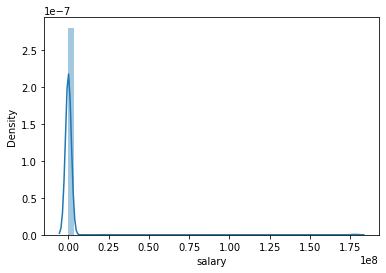

In [37]:
sns.distplot(seek.salary)

In [38]:
seek['salary'].describe()

count    2.795000e+03
mean     5.557294e+05
std      8.906731e+06
min      1.185600e+04
25%      9.000000e+04
50%      9.000000e+04
75%      9.000000e+04
max      1.778400e+08
Name: salary, dtype: float64

In [39]:
def Salary_Range(x):
    if x <= 70000:
        return 'low salary'
    elif (x>70000) and (x<120000):
        return 'medium salary'
    elif x >=120000:
        return 'high salary'
    else:
        return 'no salary'
    

seek['Salary_Range'] =seek['salary'].apply(Salary_Range)

In [40]:
print(seek.salary.min())
print(seek.salary.max())
print(seek.salary.mean())

11856.0
177840000.0
555729.4428372093


In [41]:
seek.tail()

,title,date,company,location,area,salary,description,Job_Category,City,Area_Category,Salary_Range
2790,Archaeologist / Heritage Advisor Regional NSW,19 Jan 2021,Eco Logical Australia,"Newcastle, Maitland & Hunter",Environment & Sustainability Consulting,90000.0,"Are you seeking a company that:,With the conti...",Other,Other,Other,medium salary
2791,Marketing Specialist,19 Jan 2021,Prenolica Limited,Melbourne,CBD & Inner Suburbs,69999.5,"You will work for Prenolica, an Australian Bio...",Senior level,Melbourne,CBD,low salary
2792,Graphic Designer - Coordinator,19 Jan 2021,PACIFIC COMMUNITY,Asia Pacific,PNG & Pacific Islands,89999.5,",The , (SPC) is the principal scientific and ...",Other,Other,Other,medium salary
2793,Accounts Assistant,19 Jan 2021,Imperial Brands Australasia,Sydney,North West & Hills District,90000.0,Celebrate wins in a collaborative work environ...,Entry level,Sydney,North,medium salary
2794,Clinical Lead Practitioner - Located in the Wh...,18 Jan 2021,ProCare Australia,Northern QLD,"Psychology, Counselling & Social Work",93000.0,Our customer is a leading organisation in the ...,Senior level,Other,Other,medium salary


In [42]:
seek['Salary_Range'].value_counts()

medium salary    2450
high salary       215
low salary        130
Name: Salary_Range, dtype: int64

### Clean the Description Column

In [43]:
seek.description[200]

'Phenomenex is a global technology leader committed to developing novel analytical chemistry solutions that solve the separation and purification challenges of researchers in industrial, clinical, government and academic laboratories. From drug discovery and pharmaceutical development to food safety and environmental analysis, Phenomenex chromatography products, technical services and chemical reference standards accelerate science and help researchers improve global health and well-being.,Selected by the Wall Street Journal as an "Exceptional Workplace," Phenomenex is defined by its passionate people, dynamic culture and distinctive ingenuity. These common characteristics unify the Phenomenex companies worldwide behind our mission "to promote the growth, prosperity and well-being of those we serve - our customers, our employees, and humanity.,\xa0,Generate prospective customers through cold calling and may qualify and follow up with sales leads. Focus on lead qualification and lead pr

In [44]:
# check the NAN columns

seek[seek['description'].isna()]

,title,date,company,location,area,salary,description,Job_Category,City,Area_Category,Salary_Range
9,APS3 / APS4 Data Analyst,15 Feb 2021,Karlka Recruiting Group,ACT,Government - Federal,90000.0,NaN,Data Analyst,ACT,Other,medium salary
32,Data Analyst,22 Jan 2021,CANSTAR,Brisbane,CBD & Inner Suburbs,90000.0,NaN,Data Analyst,Brisbane,CBD,medium salary
35,Mapping Developer/Consultant,3 Feb 2021,Bridge Associates APAC Pty Ltd,Sydney,"CBD, Inner West & Eastern Suburbs",90000.0,NaN,Data Engineer,Sydney,CBD,medium salary
39,Graduate Risk Advisory,10 Feb 2021,NaN,Brisbane,CBD & Inner Suburbs,100000.0,NaN,Entry level,Brisbane,CBD,medium salary
45,Customer Care Consultant,27 Jan 2021,Australian Retailers Association Talent Registry,Sydney,"CBD, Inner West & Eastern Suburbs",90000.0,NaN,Other,Sydney,CBD,medium salary
...,...,...,...,...,...,...,...,...,...,...,...
2750,Targeted GP Pharmaceutical Representative SA/WA,20 Jan 2021,EvansPetersen Healthcare Pty Ltd,Adelaide,Pharmaceuticals & Medical Devices,90000.0,NaN,Other,Adelaide,Other,medium salary
2756,Control Systems Engineer,19 Jan 2021,Enginuity,Melbourne,CBD & Inner Suburbs,110000.0,NaN,Data Engineer,Melbourne,CBD,medium salary
2776,Donor Relationship Specialist,29 Jan 2021,Cause Recruitment,Sydney,"CBD, Inner West & Eastern Suburbs",90000.0,NaN,Senior level,Sydney,CBD,medium salary
2781,APS6 Medical Device Investigator x 3,19 Jan 2021,First People Recruitment Solutions Pty Ltd,ACT,Government - Federal,11856.0,NaN,Other,ACT,Other,low salary


In [45]:
#drop the columns with NaN value 

seek.dropna(subset=['description'],inplace=True)

In [46]:
#remove any ing, y and basic cleaning for description column

stemmer = SnowballStemmer('english')
clean_text =seek['description']
print(clean_text)

0       Blue Crystal Solutions is a trusted and respec...
1       We are seeking a Data Analyst who is up for th...
2       MetLife are a leading provider of life insuran...
3       We are looking for two enthusiastic and motiva...
4       Pace Farms is a second generation family busin...
                              ...                        
2790    Are you seeking a company that:,With the conti...
2791    You will work for Prenolica, an Australian Bio...
2792     ,The , (SPC) is the principal scientific and ...
2793    Celebrate wins in a collaborative work environ...
2794    Our customer is a leading organisation in the ...
Name: description, Length: 2144, dtype: object


In [47]:
# lowercase the description
def cleaning_text(x):
    words = re.sub('[^a-zA-Z]', ' ', str(x)).lower().split()
    lemma = nltk.wordnet.WordNetLemmatizer()
    words = [lemma.lemmatize(word) for word in words]
    words = ' '.join(words)
    return words

In [48]:
seek_job = seek.apply(cleaning_text)

In [49]:
seek.description[200]

'Phenomenex is a global technology leader committed to developing novel analytical chemistry solutions that solve the separation and purification challenges of researchers in industrial, clinical, government and academic laboratories. From drug discovery and pharmaceutical development to food safety and environmental analysis, Phenomenex chromatography products, technical services and chemical reference standards accelerate science and help researchers improve global health and well-being.,Selected by the Wall Street Journal as an "Exceptional Workplace," Phenomenex is defined by its passionate people, dynamic culture and distinctive ingenuity. These common characteristics unify the Phenomenex companies worldwide behind our mission "to promote the growth, prosperity and well-being of those we serve - our customers, our employees, and humanity.,\xa0,Generate prospective customers through cold calling and may qualify and follow up with sales leads. Focus on lead qualification and lead pr

#### Check the null value

In [50]:
seek.isnull().sum()

title              0
date               0
company          125
location           0
area               0
salary             0
description        0
Job_Category       0
City               0
Area_Category      0
Salary_Range       0
dtype: int64

In [51]:
seek.dropna(subset=['company'],inplace=True)

In [52]:
seek.isnull().sum()

title            0
date             0
company          0
location         0
area             0
salary           0
description      0
Job_Category     0
City             0
Area_Category    0
Salary_Range     0
dtype: int64

#### Define X for price modelling 

In [53]:
seek_X = seek.drop(['salary', 'Salary_Range', 'description', 'title', 'location', 'area'], axis=1)

In [54]:
seek.description = seek.description.astype(str)
seek.Job_Category = seek.Job_Category.astype(str)


In [55]:
X = pd.DataFrame()

for column in seek_X:
    vect = TfidfVectorizer(stop_words='english', min_df=0.005, ngram_range=(1,2))
    
    # fit vectorizer using train data 
    dtm = vect.fit_transform(seek_X[column])
    df = pd.DataFrame(dtm.toarray(), columns=vect.get_feature_names())
    X = pd.concat([X, df], axis=1, sort=False)
    print('Column Name: {:15} |  No. of Features: {:5}'.format(column, len(vect.get_feature_names())))

Column Name: date            |  No. of Features:    47
Column Name: company         |  No. of Features:   107
Column Name: Job_Category    |  No. of Features:    12
Column Name: City            |  No. of Features:     6
Column Name: Area_Category   |  No. of Features:     5


### Factors that impact salary

In [56]:
y = seek['Salary_Range']

In [57]:
# Baseline accuracy

y.value_counts(normalize=True)

medium salary    0.899455
high salary      0.056464
low salary       0.044081
Name: Salary_Range, dtype: float64

In [58]:
# Standardize the formula

ss = StandardScaler()
Xs = ss.fit_transform(X)

In [59]:
# Split training and testing data

Xs_train, Xs_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)


#### Logistic Regression

In [60]:
lr = LogisticRegression(max_iter=200)
lr.fit(Xs_train, y_train)
print('Test score:',lr.score(Xs_test, y_test))
print('Train score:',lr.score(Xs_train, y_train))

Test score: 0.9130434782608695
Train score: 0.9090236686390533


In [61]:
y_hat = lr.predict(Xs_test)
cross_val_score(lr, Xs_train, y_train, cv=10)

array([0.88235294, 0.89705882, 0.9037037 , 0.88148148, 0.88148148,
       0.9037037 , 0.9037037 , 0.9037037 , 0.88148148, 0.91111111])

In [62]:
print(metrics.confusion_matrix(y_test, y_hat))
print('-------------------------------------------------------', '\n')
print(metrics.classification_report(y_test, y_hat, target_names=['low salary', 'medium salary', 'high salary']))

[[  4   0  29]
 [  0   3  17]
 [  3   9 602]]
------------------------------------------------------- 

               precision    recall  f1-score   support

   low salary       0.57      0.12      0.20        33
medium salary       0.25      0.15      0.19        20
  high salary       0.93      0.98      0.95       614

     accuracy                           0.91       667
    macro avg       0.58      0.42      0.45       667
 weighted avg       0.89      0.91      0.89       667



#### Random Forest

In [63]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(Xs_train, y_train)
print('Test score:',rf.score(Xs_test, y_test))
print('Train score:',rf.score(Xs_train, y_train))

Test score: 0.9760119940029985
Train score: 0.9911242603550295


In [64]:
y_hat = rf.predict(Xs_test)
cross_val_score(rf, Xs_train, y_train, cv=10).mean()

0.956367102396514

In [65]:
print(metrics.confusion_matrix(y_test, y_hat))
print('-------------------------------------------------------', '\n')
print(metrics.classification_report(y_test, y_hat, target_names=['low salary', 'medium salary', 'high salary']))

[[ 28   0   5]
 [  0  20   0]
 [  5   6 603]]
------------------------------------------------------- 

               precision    recall  f1-score   support

   low salary       0.85      0.85      0.85        33
medium salary       0.77      1.00      0.87        20
  high salary       0.99      0.98      0.99       614

     accuracy                           0.98       667
    macro avg       0.87      0.94      0.90       667
 weighted avg       0.98      0.98      0.98       667



In [66]:
pd.Series(rf.feature_importances_, index=Xs_train.columns).sort_values(ascending=False).head(10)

pty          0.048485
cbd          0.042410
sydney       0.033058
2021         0.031329
limited      0.030895
partners     0.030777
australia    0.028031
melbourne    0.026056
onset        0.024407
data         0.023968
dtype: float64

#### Decision Tree

In [67]:
dt=DecisionTreeClassifier(random_state=42,max_depth=5)
dt.fit(Xs_train, y_train)
print('Test score:',dt.score(Xs_test, y_test))
print('Train score:',dt.score(Xs_train, y_train))

Test score: 0.9190404797601199
Train score: 0.908284023668639


In [68]:
y_hat = dt.predict(Xs_test)
cross_val_score(dt,Xs_train, y_train, cv=10)

array([0.89705882, 0.90441176, 0.9037037 , 0.88888889, 0.9037037 ,
       0.88888889, 0.91111111, 0.8962963 , 0.8962963 , 0.88888889])

In [69]:
pd.Series(dt.feature_importances_, index=Xs_train.columns).sort_values(ascending=False).head(10)

partners         0.151910
onset            0.146243
limited          0.124488
sleep            0.124082
12               0.108314
data engineer    0.097262
capital          0.087962
2021             0.077367
10               0.055017
feb              0.027355
dtype: float64

In [70]:
print(metrics.confusion_matrix(y_test, y_hat))
print('-------------------------------------------------------', '\n')
print(metrics.classification_report(y_test, y_hat, target_names=['low salary', 'medium salary', 'high salary']))

[[  5   0  28]
 [  0   3  17]
 [  0   9 605]]
------------------------------------------------------- 

               precision    recall  f1-score   support

   low salary       1.00      0.15      0.26        33
medium salary       0.25      0.15      0.19        20
  high salary       0.93      0.99      0.96       614

     accuracy                           0.92       667
    macro avg       0.73      0.43      0.47       667
 weighted avg       0.91      0.92      0.90       667



### Factors that distinguish job category

In [71]:
seek_X1 = seek.drop(['title', 'date', 'company', 'area', 'salary', 'Job_Category','City', 'Area_Category', 'Salary_Range'], axis=1)

In [72]:
seek.description = seek.description.astype(str)
seek.Job_Category = seek.Job_Category.astype(str)

In [73]:
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['click', 'apply', 'cover','letter', 'successful', 'candidate','data', 'science',
              'world', 'class', 'join', 'team', 'high', 'quality', 'analytics', 'button', 'com', 'au']
stopwords.extend(newStopWords)

In [74]:
X1 = pd.DataFrame()

for column in seek_X1:
    vect = TfidfVectorizer(stop_words=stopwords, min_df=0.005, ngram_range=(1,2))
    
    # fit vectorizer using train data 
    dtm = vect.fit_transform(seek_X1[column])
    df = pd.DataFrame(dtm.toarray(), columns=vect.get_feature_names())
    X1 = pd.concat([X1, df], axis=1, sort=False)
    print('Column Name: {:15} |  No. of Features: {:5}'.format(column, len(vect.get_feature_names())))

Column Name: location        |  No. of Features:    47
Column Name: description     |  No. of Features:  4910


In [75]:
y1 = seek['Job_Category']

In [76]:
#Baseline accuracy

y1.value_counts(normalize=True)

Senior level      0.301634
Other             0.249629
Data Engineer     0.233779
Data Analyst      0.096582
Entry level       0.065874
Data Scientist    0.052501
Name: Job_Category, dtype: float64

In [77]:
# Standardize the formula

ss = StandardScaler()
Xs1 = ss.fit_transform(X1)

In [78]:
Xs1

array([[-0.24689347,  4.31299684, -0.07732447, ..., -0.10447389,
        -0.2172461 , -0.07118165],
       [-0.24689347, -0.23185735, -0.07732447, ..., -0.10447389,
        -0.2172461 , -0.07118165],
       [-0.24689347, -0.23185735, -0.07732447, ..., -0.10447389,
        -0.2172461 , -0.07118165],
       ...,
       [-0.24689347, -0.23185735, -0.07732447, ..., -0.10447389,
        -0.2172461 , -0.07118165],
       [-0.24689347, -0.23185735, -0.07732447, ..., -0.10447389,
         1.8287828 , -0.07118165],
       [-0.24689347, -0.23185735, -0.07732447, ...,  6.04665429,
        -0.2172461 , -0.07118165]])

In [79]:
Xs1_train, Xs1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.33, random_state=42)

In [80]:
Xs1_train

,act,adelaide,bendigo,bendigo goldfields,brisbane,central,coast,darwin,far,far north,...,years hands,years industry,years relevant,yes,yet,york,young,young people,zealand,zoom
380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.595474,0.595474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0
1036,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0
1703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.069230,0.0
84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.10056,0.0,0.083586,0.0
1692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0
1294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0
1459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0


### Logistic Regression

In [81]:
lr1 = LogisticRegression(max_iter=500)
lr1.fit(Xs1_train, y1_train)

print('Test score:',lr1.score(Xs1_test, y1_test))
print('Train score:',lr1.score(Xs1_train, y1_train))

Test score: 0.7556221889055472
Train score: 0.9090236686390533


In [82]:
y1_hat = lr1.predict(Xs1_test)
cross_val_score(lr1, Xs1_train, y1_train, cv=10)

array([0.71323529, 0.71323529, 0.75555556, 0.71111111, 0.76296296,
       0.68888889, 0.67407407, 0.67407407, 0.65925926, 0.65185185])

In [83]:
print(metrics.confusion_matrix(y1_test, y1_hat))
print('-------------------------------------------------------', '\n')
print(metrics.classification_report(y1_test, y1_hat, target_names=['Senior level','Other','Data Engineer', 'Data Analyst','Entry level','Data Scientist']))

[[ 34   7   0   1   5  20]
 [  0 142   0   0  12   8]
 [  0   2  15   0   8   5]
 [  0   6   0   9  18  13]
 [  0   2   0   0 124  22]
 [  0  11   0   0  23 180]]
------------------------------------------------------- 

                precision    recall  f1-score   support

  Senior level       1.00      0.51      0.67        67
         Other       0.84      0.88      0.86       162
 Data Engineer       1.00      0.50      0.67        30
  Data Analyst       0.90      0.20      0.32        46
   Entry level       0.65      0.84      0.73       148
Data Scientist       0.73      0.84      0.78       214

      accuracy                           0.76       667
     macro avg       0.85      0.63      0.67       667
  weighted avg       0.79      0.76      0.74       667



### Random Forest

In [84]:
rf1 = RandomForestClassifier(n_estimators=200, random_state=42)
rf1.fit(Xs1_train, y1_train)
print('Test score:',rf1.score(Xs1_test, y1_test))
print('Train score:',rf1.score(Xs1_train, y1_train))

Test score: 0.9175412293853074
Train score: 0.9992603550295858


In [85]:
y1_hat = rf1.predict(Xs1_test)
cross_val_score(rf1, Xs1_train, y1_train, cv=10)

array([0.82352941, 0.875     , 0.85925926, 0.85185185, 0.88148148,
       0.77037037, 0.84444444, 0.86666667, 0.81481481, 0.82222222])

In [86]:
print(metrics.confusion_matrix(y1_test, y1_hat))
print('-------------------------------------------------------', '\n')
print(metrics.classification_report(y1_test, y1_hat, target_names=['Senior level','Other','Data Engineer', 'Data Analyst','Entry level','Data Scientist']))

[[ 61   2   0   0   2   2]
 [  0 158   0   0   4   0]
 [  0   0  30   0   0   0]
 [  0   4   0  32   8   2]
 [  0   2   0   0 140   6]
 [  0   7   0   0  16 191]]
------------------------------------------------------- 

                precision    recall  f1-score   support

  Senior level       1.00      0.91      0.95        67
         Other       0.91      0.98      0.94       162
 Data Engineer       1.00      1.00      1.00        30
  Data Analyst       1.00      0.70      0.82        46
   Entry level       0.82      0.95      0.88       148
Data Scientist       0.95      0.89      0.92       214

      accuracy                           0.92       667
     macro avg       0.95      0.90      0.92       667
  weighted avg       0.92      0.92      0.92       667



In [87]:
pd.Series(rf1.feature_importances_, index=Xs1_train.columns).sort_values(ascending=False).head(10)

analyst      0.012459
engineer     0.011350
scientist    0.007540
software     0.006601
senior       0.006480
developer    0.006051
lead         0.004460
please       0.004449
business     0.003632
solutions    0.003478
dtype: float64

### Decision Tree

In [88]:
dt1=DecisionTreeClassifier(random_state=42,max_depth=6)
dt1.fit(Xs1_train, y1_train)
print('Test score:',dt1.score(Xs1_test, y1_test))
print('Train score:',dt1.score(Xs1_train, y1_train))

Test score: 0.5382308845577212
Train score: 0.5761834319526628


In [89]:
y1_hat = dt1.predict(Xs1_test)
cross_val_score(dt1,Xs1_train, y1_train, cv=10).mean()

0.5185294117647059

In [90]:
pd.Series(dt1.feature_importances_, index=Xs1_train.columns).sort_values(ascending=False).head(10)

engineer       0.149480
analyst        0.140944
senior         0.107494
scientist      0.085214
developer      0.084092
software       0.072763
insights       0.060198
role please    0.032258
government     0.030486
junior         0.025514
dtype: float64

In [91]:
print(metrics.confusion_matrix(y1_test, y1_hat))
print('-------------------------------------------------------', '\n')
print(metrics.classification_report(y1_test, y1_hat, target_names=['Senior level','Other','Data Engineer', 'Data Analyst','Entry level','Data Scientist']))

[[ 34   3   0   0  27   3]
 [  4 108   1   0  44   5]
 [  0   0  18   0  12   0]
 [  0   4   1   4  34   3]
 [  0   8   2   0 137   1]
 [  0  12   3   0 141  58]]
------------------------------------------------------- 

                precision    recall  f1-score   support

  Senior level       0.89      0.51      0.65        67
         Other       0.80      0.67      0.73       162
 Data Engineer       0.72      0.60      0.65        30
  Data Analyst       1.00      0.09      0.16        46
   Entry level       0.35      0.93      0.50       148
Data Scientist       0.83      0.27      0.41       214

      accuracy                           0.54       667
     macro avg       0.77      0.51      0.52       667
  weighted avg       0.73      0.54      0.53       667

